In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from itertools import cycle
import torch 

import EWOthello.utils.plot_helpers as plt_utils
from EWOthello.mingpt.probe_model import BatteryProbeClassification
from EWOthello.data.othello import *
from EWOthello.mingpt.dataset import CharDataset 
from EWOthello.mingpt.model import GPT, GPTConfig, GPTforProbing, GPTforProbing_v2

/home/deanhazineh/anaconda3/envs/emergent_world/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
datapath = "../EWOthello/ckpts/"
all_files = os.listdir(datapath)
GPT_Folders = [name for name in all_files if name.startswith("Dean_GPTv2_Synthetic")]
GPT_Folders.sort()
print(GPT_Folders)

['Dean_GPTv2_Synthetic_1L1H', 'Dean_GPTv2_Synthetic_1L8H', 'Dean_GPTv2_Synthetic_4L1H', 'Dean_GPTv2_Synthetic_4L8H', 'Dean_GPTv2_Synthetic_8L8H']


../EWOthello/ckpts/Dean_GPTv2_Synthetic_1L1H/
0.949864406779661
../EWOthello/ckpts/Dean_GPTv2_Synthetic_1L8H/
0.9864406779661018
../EWOthello/ckpts/Dean_GPTv2_Synthetic_4L1H/
0.9975254237288136
../EWOthello/ckpts/Dean_GPTv2_Synthetic_4L8H/
0.9967796610169491
../EWOthello/ckpts/Dean_GPTv2_Synthetic_8L8H/
0.9991525423728814


Text(0.5, 1.0, 'Legality of Next-Move Prediction')

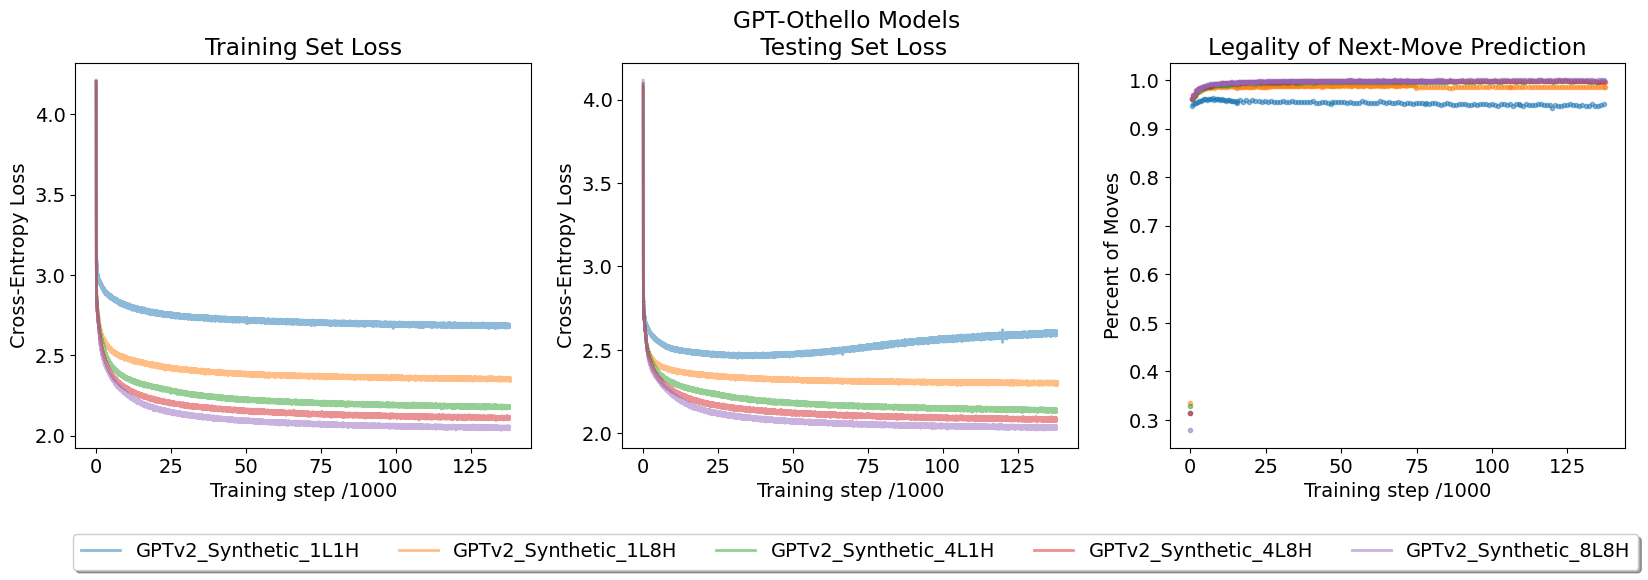

In [9]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(20,5))
ax = plt_utils.addAxis(fig,1,3)
colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'])

for fold in GPT_Folders:
    model_path = datapath + fold + "/"
    print(model_path)
    training_history_path = [name for name in os.listdir(model_path) if name.endswith("Heads.pickle")][0]
    use_color = next(colors)
    with open(model_path + training_history_path, 'rb') as fhandle:
        training_history = pickle.load(fhandle)
        training_loss = training_history["training_loss"]
        testing_loss = training_history["testing_loss"]
        val_legal_perc = training_history["val_legal_perc"]
        step = np.arange(0, len(training_loss), 1)/1000
        
        ax[0].plot(step, training_loss, '-', color=use_color, alpha=0.5, linewidth=2, label=fold[5:])
        ax[1].plot(step, testing_loss, '-', color=use_color, alpha=0.5, linewidth=2, label=fold[5:])
        ax[2].plot(step, val_legal_perc, '.', color=use_color, alpha=0.5, markersize=6)

        print([v for v in val_legal_perc if v!=None][-1])

#ax[0].legend()
ax[0].legend(ncol=5, fancybox=True, bbox_to_anchor=(3.45, -0.2), shadow=True)
ax[0].set_xlabel("Training step /1000")
ax[1].set_xlabel("Training step /1000")
ax[2].set_xlabel("Training step /1000")
ax[0].set_ylabel("Cross-Entropy Loss")
ax[1].set_ylabel("Cross-Entropy Loss")
ax[2].set_ylabel("Percent of Moves")
ax[0].set_title("Training Set Loss")
ax[1].set_title("GPT-Othello Models \n Testing Set Loss")
ax[2].set_title("Legality of Next-Move Prediction")